In [1]:
# Basic imports
import pycba as cba  # The main package
import numpy as np  # For arrays
import matplotlib.pyplot as plt  # For plotting
from IPython import display  # For images in this notebook

In [2]:
L = [25.22,33.56,25.22]
EI = 30 * 600e7 * 1e-6
R = [-1, 0, -1, 0, -1, 0 , -1, 0]
LM = [[2, 2, 800, 16.78, 0]]
#Span No. | Load Type | Load Value | Distance a | Load Cover c

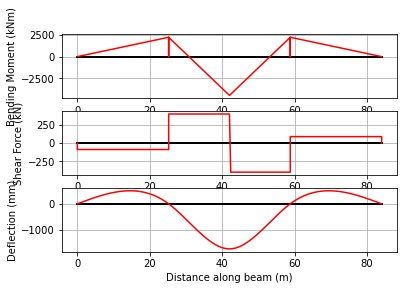

In [3]:
beam_analysis = cba.BeamAnalysis(L, EI, R, LM)
beam_analysis.analyze()
beam_analysis.plot_results()

In [4]:
beam_analysis.beam_results.R

array([-88.65395845, 488.65395845, 488.65395845, -88.65395845])

In [5]:
beam_analysis.beam_results.vRes[1].M.max()

4476.147167813659

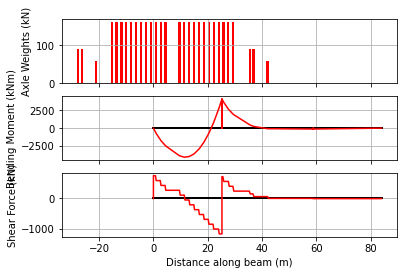

In [5]:
# axle_spacings = np.array([2])
# axle_weights = np.array([6, 6]) * 9.81  # t to kN
axle_spacings = np.array([5.150, 1.42, 6.045,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,5.15,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,5.688,5.150,1.420])
axle_weights = np.array([6, 9.24, 9.24,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,6,9.24,9.24]) * 9.81  # t to kN
bridge_analysis = cba.BridgeAnalysis()
bridge = bridge_analysis.add_bridge(L, EI, R)
vehicle = bridge_analysis.add_vehicle(axle_spacings, axle_weights)

bridge_analysis.static_vehicle(42.0, True);

In [6]:
bridge = cba.BeamAnalysis(L, EI, R,LM)
bridge.npts = 500  # Use more points along the beam members
# vehicle = cba.VehicleLibrary.get_m1600(6.25)
# axle_spacings = np.array([2])
# axle_weights = np.array([6, 6]) * 9.81  # t to kN
axle_spacings = np.array([5.150, 1.42, 6.045,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,5.15,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,1.8,5.688,5.150,1.420])
axle_weights = np.array([6, 9.24, 9.24,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,16.34,6,9.24,9.24]) * 9.81  # t to kN
vehicle = cba.Vehicle(axle_spacings, axle_weights)
bridge_analysis = cba.BridgeAnalysis(bridge, vehicle)
env = bridge_analysis.run_vehicle(0.1)

In [7]:
cvals = bridge_analysis.critical_values(env)

In [8]:
pos = cvals["Mmax"]["pos"][0]
at = cvals["Mmax"]["at"]
val = cvals["Mmax"]["val"]
print(f"Max moment is {val} kNm at {at:.2f} m when front axle position is {pos} m")

Max moment is 5463.39157911477 kNm at 43.48 m when front axle position is 66.9 m


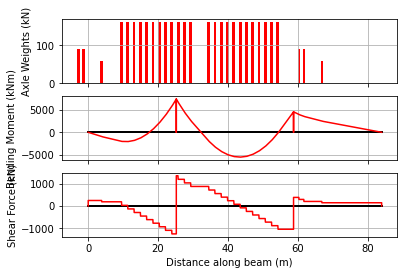

In [9]:
bridge_analysis.static_vehicle(pos, True);